## **A) installing and importing yfinance**

In [1]:
## pip install yfinance
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


## **B) downloading test and train data**

In [2]:
btc_train_data = yf.download('BTC-USD', start='2019-01-01', end='2024-01-01')
btc_train_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824
...,...,...,...,...,...
2023-12-27,43442.855469,43683.160156,42167.582031,42518.468750,25260941032
2023-12-28,42627.855469,43804.781250,42318.550781,43468.199219,22992093014


In [3]:
current_date = datetime.now().strftime('%Y-%m-%d')
btc_test_data = yf.download('BTC-USD', start='2024-01-01', end=current_date)
btc_test_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-01-01,44167.332031,44175.437500,42214.976562,42280.234375,18426978443
2024-01-02,44957.968750,45899.707031,44176.949219,44187.140625,39335274536
2024-01-03,42848.175781,45503.242188,40813.535156,44961.601562,46342323118
2024-01-04,44179.921875,44770.023438,42675.175781,42855.816406,30448091210
2024-01-05,44162.691406,44353.285156,42784.718750,44192.980469,32336029347
...,...,...,...,...,...
2025-04-05,83504.796875,84207.015625,82377.734375,83844.703125,14380803631
2025-04-06,78214.484375,83704.718750,77097.742188,83504.507812,36294853736


## **C) Plotting data**

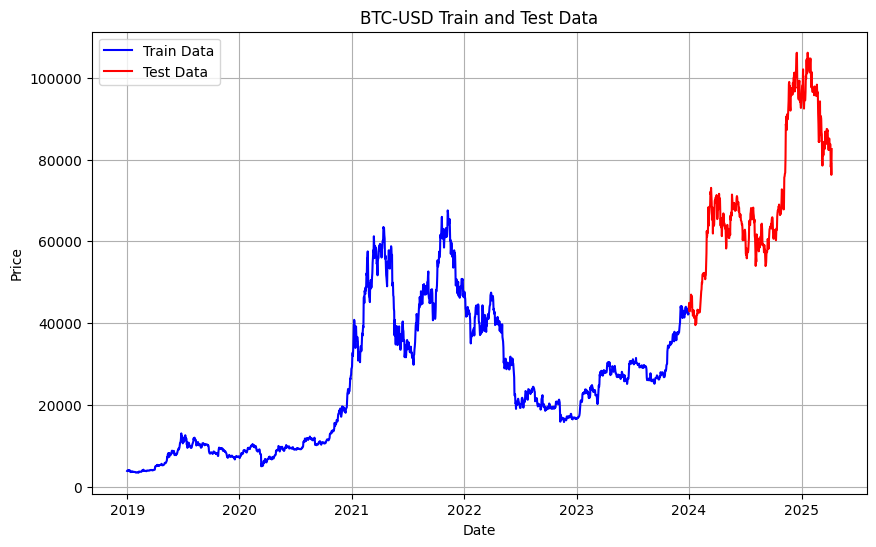

In [4]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot train data
plt.plot(btc_train_data.index, btc_train_data['Close'], color='blue', label='Train Data')

# Plot test data
plt.plot(btc_test_data.index, btc_test_data['Close'], color='red', label='Test Data')

plt.title('BTC-USD Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## **D) Normalizing train data**

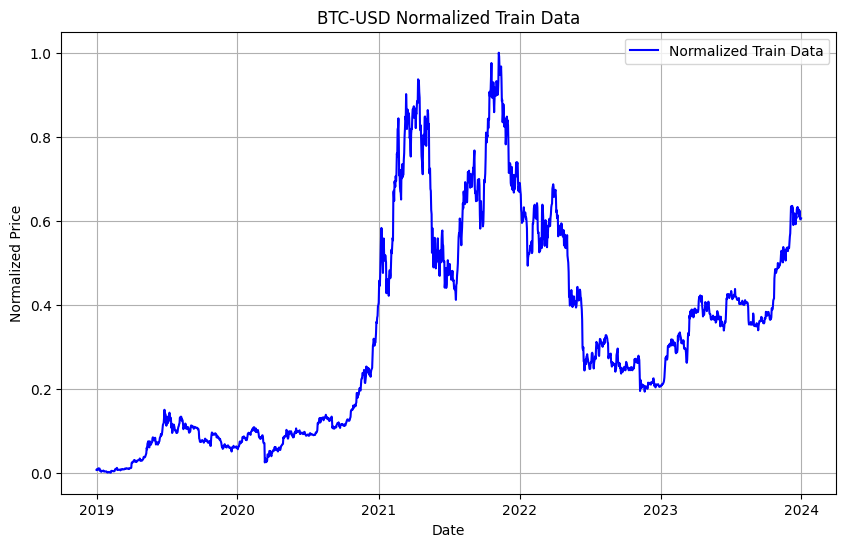

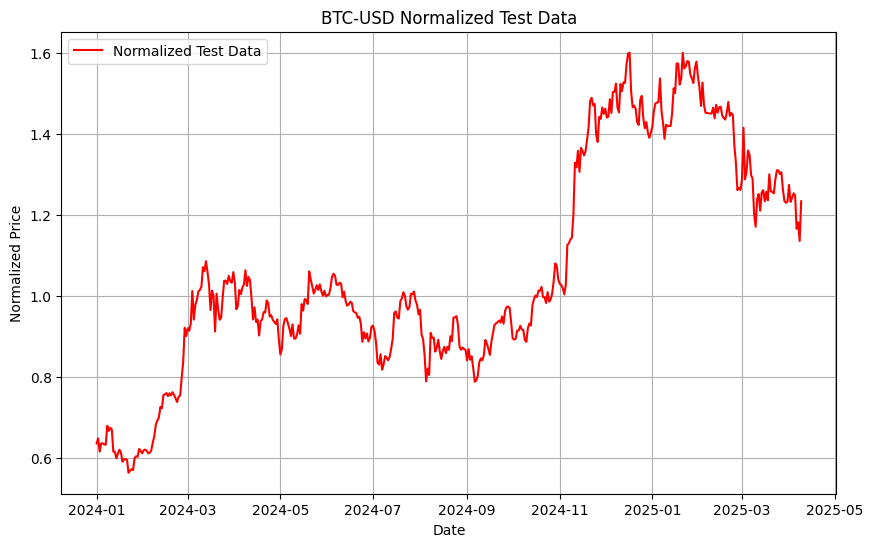

In [5]:
train_close_prices = btc_train_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
normalized_train_data = scaler.fit_transform(train_close_prices)
plt.figure(figsize=(10, 6))

# Plot normalized train data
plt.plot(btc_train_data.index, normalized_train_data, color='blue', label='Normalized Train Data')

plt.title('BTC-USD Normalized Train Data')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


## Normalizing Test data
test_close_prices = btc_test_data['Close'].values.reshape(-1, 1)
normalized_test_data = scaler.transform(test_close_prices)

# Plot normalized test data
plt.figure(figsize=(10, 6))
plt.plot(btc_test_data.index, normalized_test_data, color='red', label='Normalized Test Data')
plt.title('BTC-USD Normalized Test Data')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

## **E) Provide data for model**

In [6]:

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Number of past data points to consider for prediction
look_back = 60

# Creating input and output data for the model
X_train, y_train = create_dataset(normalized_train_data, look_back)

# Print the shape of the training data
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)


X_train.shape: (1766, 60)
y_train.shape: (1766,)


## **F) Model Architecure**

In [10]:
# Create a sequential model
model = Sequential()

# Adding the first LSTM layer with 50 units and a dropout rate of 0.2
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding additional LSTM layers with dropout (similar to the image)
for _ in range(2):
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

# The final LSTM layer does not return sequences
model.add(LSTM(units=50))


# Adding a dense output layer
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## **G) Fitting the model into training data**

In [11]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae', 'mape']  # Mean Absolute Error and Mean Absolute Percentage Error
)

# Train the model with validation split to monitor performance
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0546 - mae: 0.1555 - mape: 94.1937 - val_loss: 0.0021 - val_mae: 0.0351 - val_mape: 8.4601
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mae: 0.0433 - mape: 22.4023 - val_loss: 0.0024 - val_mae: 0.0382 - val_mape: 9.2126
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - mae: 0.0379 - mape: 16.9204 - val_loss: 0.0016 - val_mae: 0.0356 - val_mape: 9.3849
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mae: 0.0402 - mape: 15.7524 - val_loss: 0.0011 - val_mae: 0.0247 - val_mape: 6.2127
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - mae: 0.0385 - mape: 16.8396 - val_loss: 0.0012 - val_mae: 0.0298 - val_mape: 7.8434
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0031 - mae: 0.0360 - mape: 15.0881 - val_loss: 8.5655e-04 - val_mae: 0.0228 - val_mape: 6.0083
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027 - mae: 0.03

## **H) Test the model**

In [12]:
# Number of past data points to consider for prediction
look_back = 60

# Creating input and output data for the model
X_test, y_test = create_dataset(normalized_test_data, look_back)

# Print the shape of the testing data
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


X_test.shape: (405, 60)
y_test.shape: (405,)


In [13]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {evaluation[0]}")
print(f"Test MAE: {evaluation[1]}")
print(f"Test MAPE: {evaluation[2]}%")

# Make predictions
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mae: 0.0546 - mape: 4.6914
Test Loss (MSE): 0.019023749977350235
Test MAE: 0.09689512848854065
Test MAPE: 7.377361297607422%
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0968951295528933
Root Mean Squared Error: 0.13792660449530836
R-squared: 0.6598584367458118


## **I) Plotting the result**

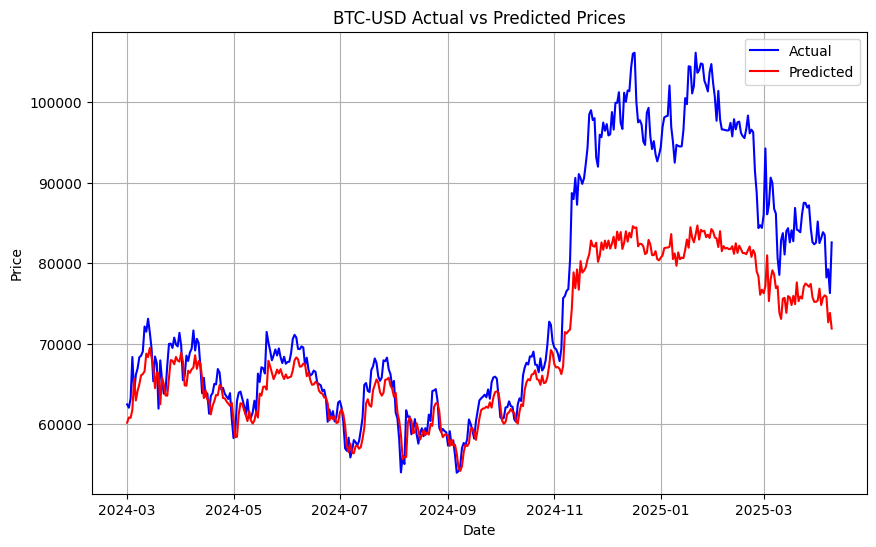

In [15]:
# Inverse transform the predicted values to their original scale
predicted_values = scaler.inverse_transform(y_pred)

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(btc_test_data.index[look_back:], btc_test_data['Close'][look_back:], color='blue', label='Actual')

# Plot predicted values
plt.plot(btc_test_data.index[look_back:], predicted_values, color='red', label='Predicted')

plt.title('BTC-USD Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
